<a href="https://colab.research.google.com/github/PrathameshKGPian/Prathamesh/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 SA

Hey Everyone!!
We hope that you are excited to apply your newly acquired knowledge and test it on this notebook.
In this assignment, we will be walking through creating an email classifier based the content the mail has.

## About the data

The data "email.csv" has a few rows and about 3K columns including <b>Email_no.</b> and <b>spam</b>. <br>
Email_no. is like a unique id for an email and spam denotes whether the given mail is a spam or not (0 = not spam, 1 = spam)<br>
Rest of the columns are words in english with the values being equal to the frequency of that word in the email.
<br>Our goal is to predict whether the given mail is spam or not

## Importing useful libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the data
### If you are using Datalore, you may use the csv file directly. Otherwise you may download it from <a href = "https://drive.google.com/file/d/1OxJ6SSuPypg-AfLbMRl0O9So9aDDNzbC/view?usp=sharing">this link</a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/emails.csv')

## Describe the data and generate some basic insights unsing methods like .info

In [ ]:
df.tail(100)
#df.info
df_spam = df[df['Prediction'] == 1 ]
# df_spam
df_notspam = df[df['Prediction'] == 0 ]
# df_notspam

In [ ]:
df_spam

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
16,Email 17,3,1,2,2,0,1,17,0,0,...,0,0,0,0,0,0,0,1,0,1
17,Email 18,36,21,6,14,7,17,194,25,5,...,0,0,0,0,0,0,0,3,0,1
25,Email 26,12,53,2,14,18,14,287,0,2,...,0,0,0,0,0,0,0,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5162,Email 5163,2,3,1,2,1,2,32,0,0,...,0,0,0,0,0,0,0,0,0,1
5163,Email 5164,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5166,Email 5167,1,0,1,1,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_notspam

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,Email 5165,21,18,3,1,6,4,106,1,2,...,0,0,0,0,0,0,0,0,0,0
5165,Email 5166,1,0,1,0,3,1,12,1,0,...,0,0,0,1,0,0,0,0,0,0
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0


## Looking at the data

In [ ]:
# Plot histogram to visualize the top 5 common words in spam mail and non-spam mails seperately.
sum_spam = df_spam.sum()
sum_spam.drop(['Email No.','Prediction'], inplace = True)
sum_spam.head()

the     9839
to     10519
ect     3719
and     6236
for     4653
dtype: object

In [ ]:
sum_notspam = df_notspam.sum()
sum_notspam.drop(['Email No.','Prediction'], inplace = True)
sum_notspam.head()


the    24506
to     21486
ect    22885
and     9671
for    11508
dtype: object

In [ ]:
sum_spam.sort_values(ascending = False,inplace = True)
sum_notspam.sort_values(ascending = False,inplace = True)
sum_notspam.head()

e    287499
t    202913
a    181711
o    180973
n    157937
dtype: object

In [ ]:
c

e    151062
t    109878
a    105425
o    103997
i    100761
dtype: object

(array([1., 2., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([100761.  , 103276.05, 105791.1 , 108306.15, 110821.2 , 113336.25,
        115851.3 , 118366.35, 120881.4 , 123396.45, 125911.5 , 128426.55,
        130941.6 , 133456.65, 135971.7 , 138486.75, 141001.8 , 143516.85,
        146031.9 , 148546.95, 151062.  ]),
 <BarContainer object of 20 artists>)

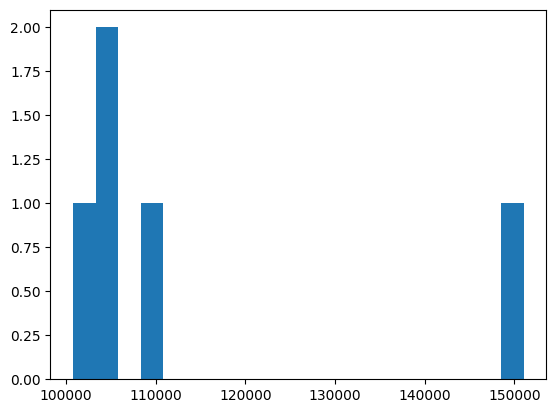

In [ ]:
hspam = sum_spam.head()
# hspam
plt.hist(x = hspam, bins  =20)

(array([1., 0., 0., 2., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([157937. , 164415.1, 170893.2, 177371.3, 183849.4, 190327.5,
        196805.6, 203283.7, 209761.8, 216239.9, 222718. , 229196.1,
        235674.2, 242152.3, 248630.4, 255108.5, 261586.6, 268064.7,
        274542.8, 281020.9, 287499. ]),
 <BarContainer object of 20 artists>)

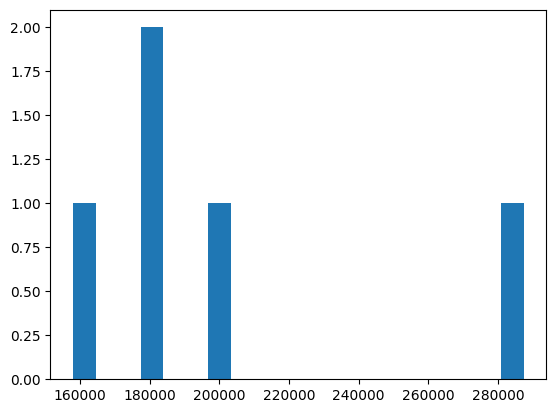

In [ ]:
hnotspam = sum_notspam.head()
# hnotspam
plt.hist(x = hnotspam, bins  =20)

## Figuring out some comparatively more important features

In [ ]:
# There are 3K rows given in this dataset, can you think of some method to reduce the number of columns in the dataset?
# Try taking only top 1.5K that will comprise of some of the most "deciding factors"
import sklearn, string,re
from sklearn.feature_extraction import text

In [ ]:
from sklearn.feature_extraction import text

In [ ]:
def remove_stop_words(df):
    result = [i for i in df if i not in text.ENGLISH_STOP_WORDS]
    return result

# def remove_special_characters(word):
#     result= word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
#     return result

# def remove_hyperlink(word):
#     return re.sub(r"http\S+", "", word)


In [ ]:
remove_stop_words(df)

In [ ]:
df = df[remove_stop_words(df)]
df.shape

(5172, 2764)

In [ ]:
# no_special_char=[]
# df.columns = df.columns.str.lower()
# for sentence in df.columns:
#     no_special_char.append(re.sub('[^A-Za-z0-9]+', ' ', sentence))
# df["no_special_char"]=no_special_char
# remove_hyperlink(df)

In [ ]:
df_sum = df.sum()
df_sum.drop(['Email No.'], inplace = True)
df_sum
df_sum.sort_values(ascending = False,inplace = True)
# df[df.columns[1:-1]]
# df[df_sum.columns]

In [ ]:
# import re
# def search_words(text):
#     result = re.findall(r'\b[^\d\W]+\b', text)
#     return " ".join(result)

# df_sum['only_words']=df_sum['column'].apply(lambda x : search_words(x))
# print("\nOnly words:")
# print(df_sum)

## Train - Test Split

In [ ]:
# Create trianing and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df[df.columns[1:-1]],df.Prediction, test_size=0.33,random_state=1)

In [ ]:
# max_feature = 1500 #number of unique words to consider
# from keras.preprocessing.text import Tokenizer

In [ ]:
# tokenizer = Tokenizer(num_words=max_feature)
# tokenizer.fit_on_texts(X_train)
# X_train_features = np.array(tokenizer.texts_to_sequences(X_train))
# X_test_features = np.array(tokenizer.texts_to_sequences(X_test))

<ipython-input-85-4bb5f23cd83b>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_features = np.array(tokenizer.texts_to_sequences(X_train))
<ipython-input-85-4bb5f23cd83b>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_features = np.array(tokenizer.texts_to_sequences(X_test))


(2762,)

In [ ]:
# X_train_features


array([list([1]), list([2]), list([3]), ..., list([]), list([]), list([])],
      dtype=object)

## Making Predictions using Multinomial NB Classifier

In [ ]:
# Feed the train data into multinomial naive bias classifier
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,Y_train)

MultinomialNB()

In [ ]:
# Check the model's accuracy of test data and plot the ROC-AUC curve
model.predict(X_test)
model.score(X_test,Y_test)

0.9396602226127709

## Plot the confusion Matrix

In [ ]:
 # Y_test[Y_test == 1].head()
# from sklearn.model_selection import train_test_split
# Xspam_train,Xspam_test,Yspam_train,Yspam_test=train_test_split(df_spam[df_spam.columns[1:-1]],df_spam.Prediction, test_size=0.33,random_state=1)

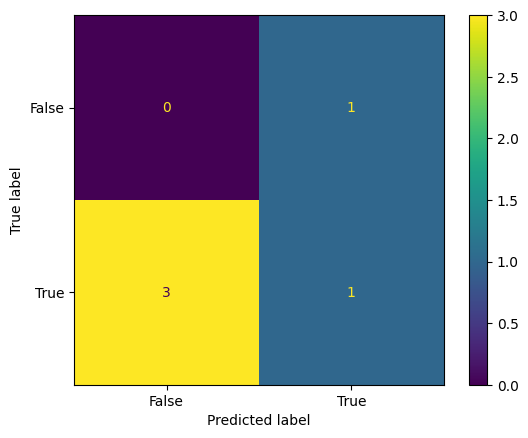

In [ ]:
# Print Confusion Matrix using any 5 words of your choice with the column 'spam'
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_train.head(), Y_test.head())
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

## Trying out with SVMs

In [ ]:
# Try using Support Vector Classifier (SVC) from scikit-learn
# Apply similar processes as above through SVC i.e., Make prediction, check accuacy and plot confusion matrix
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1,gamma=0).fit(X_train, Y_train)

In [ ]:
svc.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
svc.score(X_test,Y_test)

0.9519625073227885

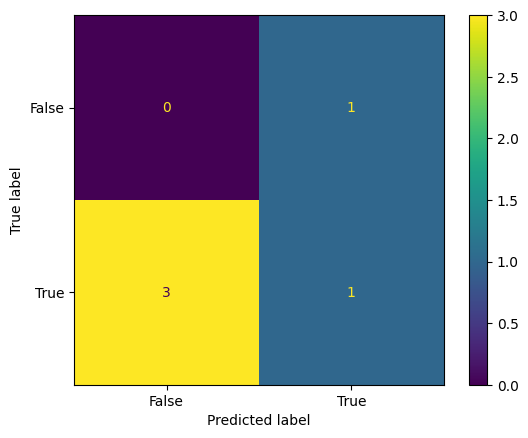

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_train.head(), Y_test.head())
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

## Comparing the models

In [ ]:
model.score(X_test,Y_test)

0.9396602226127709

In [ ]:
svc.score(X_test,Y_test)

0.9519625073227885

In [ ]:
# Which model performed better?
#svc performed better with 95% accuracy and MultinomialNB with 94%.
# Can you suggest some reason for better performance of one model over the other?
# SVM works relatively well when there is a clear margin of separation between classes.
#  SVM is more effective in high dimensional spaces and is relatively memory efficient.
#  SVM is effective in cases where the dimensions are greater than the number of samples.

## Bonus Question

In [ ]:
# Given a string. Try to create the dataset having each word of dataset as column and row values as the frequency of that word.
# For example
# s = "I am a Python developer and currently working on a project to classify mails"
# dataframe = {"I" : 1,
#              "am" :1,
#              "a" : 2,
#               ...}